In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Load the dataset

def preprocess_text(text):
    
    tokens = word_tokenize(text.lower())
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [15]:
file_path = r"C:\Users\PMLS\Desktop\All desktop things\DS internship\IMBD.csv"

In [16]:
data_imbd= pd.read_csv(file_path)

In [ ]:
print("\nTail of the DataFrame:")
print(data_imbd.tail())


print("\nSummary of the DataFrame:")
print(data_imbd.info())

print("\nBrief statistical summary:")
print(data_imbd.describe())

print("\nBoxplot for the 'rating' column:")
data_imbd.boxplot(column='rating')

print("\nDimensions of the DataFrame:")
print(data_imbd.shape)
data_imbd.mode()

In [23]:
print ("Head of the DataFrame:\n" ,data_imbd.head())
print("\nUnique values in the 'rating' column:")
print(data_imbd['rating'].unique())
print("Rating Distribution:\n",data_imbd['rating'].value_counts())

Head of the DataFrame:
                     title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

 

C:\Windows\Temp\ipykernel_2568\3314969362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_imbd['rating'].fillna(data_imbd['rating'].mean(), inplace=True)


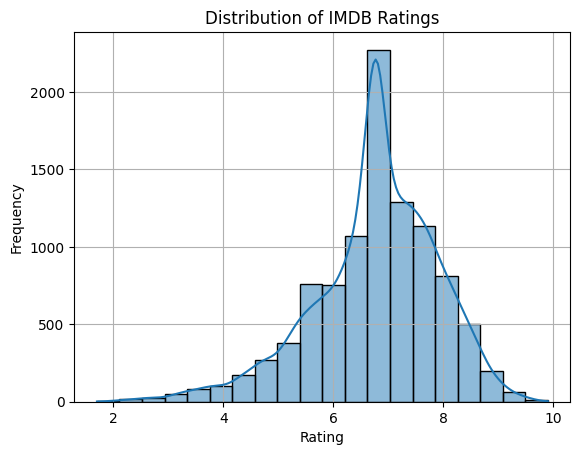

In [ ]:
data_imbd['rating'] = pd.to_numeric(data_imbd['rating'], errors='coerce')

sns.histplot(data_imbd['rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [36]:
import re
from nltk.corpus import stopwords

# Just make sure to download stopwords once
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase and extract words only (no punctuation)
    tokens = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data_imbd = data_imbd.dropna(subset=['description'])
data_imbd['processed_description'] = data_imbd['description'].apply(preprocess_text)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_imbd['processed_description'])


In [39]:
data_imbd = data_imbd.dropna(subset=['rating'])
data_imbd['rating'] = pd.to_numeric(data_imbd['rating'], errors='coerce')
y = (data_imbd['rating'] >= 7).astype(int)  # 1 = good, 0 = not
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Evaluate the model

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1989
           1       0.64      0.41      0.50      1496

    accuracy                           0.65      3485
   macro avg       0.65      0.62      0.62      3485
weighted avg       0.65      0.65      0.63      3485

